# python特性
https://mp.weixin.qq.com/s/LahzheUnV0YNpZnY1bbFFA

## Python 中的浅拷贝与深拷贝

浅拷贝（shallow copy）和深拷贝（deep copy）的区别

### Python 的引用计数
首先我们要知道，Python 内不可变对象的内存管理方式是引用计数。因此，我们在谈论拷贝时，其实谈论的主要特点都是基于可变对象的。我们来看下面这段代码

因为我们这里操作的是不可变对象，Python 用引用计数的方式管理它们，所以 Python 不会对值相同的不可变对象，申请单独的内存空间。只会记录它的引用次数

In [1]:
import copy

In [2]:
a = 'sth'
b = a
c = copy.copy(a)
d = copy.deepcopy(a)

In [6]:
id(b), id(c), id(d)

(4463182488, 4463182488, 4463182488)

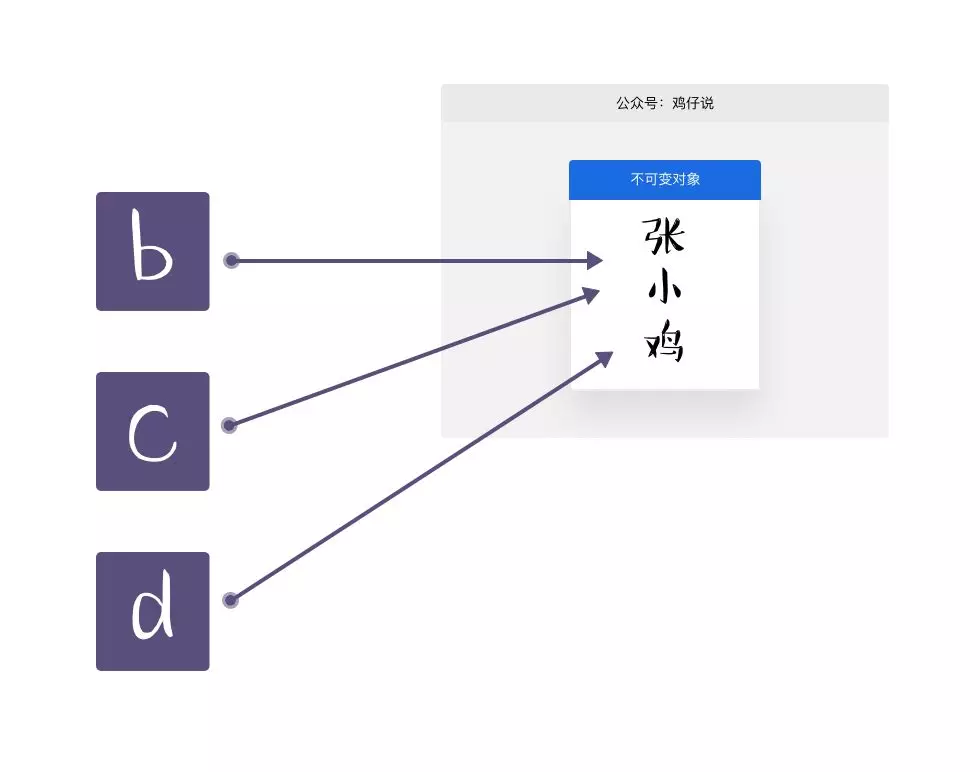

### 浅拷贝
我们先来比较一下浅拷贝和赋值在可变对象上的区别

In [8]:
a = ['sth']
b = a
c = copy.copy(a)
d = copy.deepcopy(a)
id(b), id(c), id(d)

(4462644104, 4463802760, 4462644168)

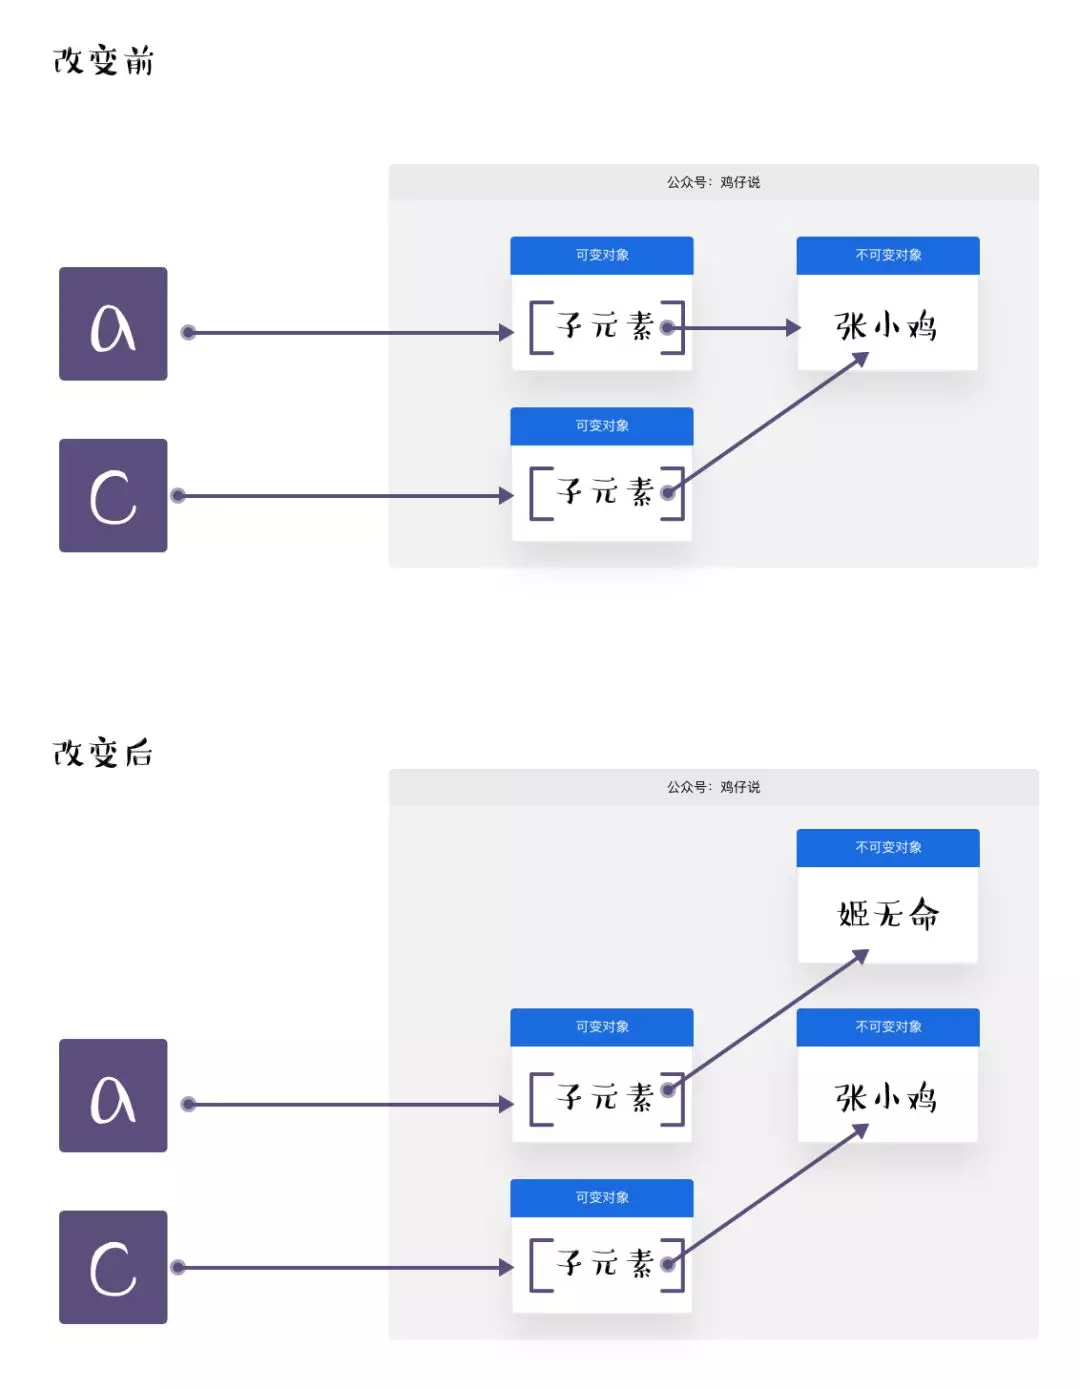

操作不可变对象时，由于引用计数的特性，被拷贝的元素改变时，就相当于撕掉了原来的标签，重新贴上新的标签一样，对于我们已拷贝的元素没有任何影响。因此在操作不可变对象时，浅拷贝和深拷贝是没有区别的

### 总结
因此，在下次我们遇到这类问题时，我们说出以下关键点，基本就很稳了

由于 Python 内部引用计数的特性，对于不可变对象，浅拷贝和深拷贝的作用是一致的，就相当于复制了一份副本，原对象内部的不可变对象的改变，不会影响到复制对象

浅拷贝的拷贝。其实是拷贝了原始元素的引用（内存地址），所以当拷贝可变对象时，原对象内可变对象的对应元素的改变，会在复制对象的对应元素上，有所体现

深拷贝在遇到可变对象时，又在内部做了新建了一个副本。所以，不管它内部的元素如何变化，都不会影响到原来副本的可变对象

## 优雅你的判断语句

### 单行 if 语句：if...else... 三目运算符

In [1]:
# 平凡方法
x = -5
if x > 0:
    y = x
else:
    y = -x
print(y)

5


In [2]:
# 优雅方法
y = x if x>0 else -x
print(y)

5


In [14]:
y = x if x>0

SyntaxError: invalid syntax (<ipython-input-14-f8c5e81f85bf>, line 1)

### 判断诸多条件是否至少有一个成立

In [3]:
a, b, c = 60, 50, 80

In [5]:
# 平凡方法
if a<60 or b<60 or c<60:
    print('no pass!')

no pass!


In [6]:
# 优雅方法
if any([a<60, b<60, c<60]):
    print('no pass!')

no pass!


### 判断诸多条件是否全部成立

In [10]:
if a>40 and b>40 and c>40:
    print('pass') 

pass


In [11]:
if all([a>40, b>40, c>40]):
    print('pass') 

pass


## 优雅你的循环语句

### 复杂for循环

In [20]:
import numpy as np
l1 = np.arange(48).reshape(12, 4)
l1.tolist()

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 27],
 [28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39],
 [40, 41, 42, 43],
 [44, 45, 46, 47]]

In [21]:
# 相当于flatten
[j for i in l1 for j in i]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47]

### 同时遍历序列的元素和元素下标

In [16]:
for i, v in enumerate(list('abc')):
    print(i, v)

0 a
1 b
2 c


### 使用 product 扁平化多层嵌套循环

In [ ]:
def find_twelve(num_list1, num_list2, num_list3):    
    """
    从 3 个数字列表中，寻找是否存在和为 12 的 3 个数
    """
    for num1 in num_list1:        
        for num2 in num_list2:            
            for num3 in num_list3:                
                if num1 + num2 + num3 == 12:                    
                    return num1, num2, num3

In [ ]:
from itertools import product

def find_twelve_v2(num_list1, num_list2, num_list3):
    for num1, num2, num3 in product(num_list1, num_list2, num_list3):        
        if num1 + num2 + num3 == 12:            
            return num1, num2, num3

### 使用 takewhile 替代 break 语句
会在迭代 iterable 的过程中不断使用当前对象作为参数调用 predicate 函数并测试返回结果，如果函数返回值为真，则生成当前对象，循环继续。否则立即中断当前循环。

In [2]:
import itertools

In [3]:
for i in itertools.takewhile(lambda x: x<5, range(10)):
    print(i)

0
1
2
3
4


### 显示循环进度

#### print 下标后设置不换行并使用‘ ’回车到行首以避免输出刷屏。

In [19]:
import time
for i in range(100):
    time.sleep(0.1)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [21]:
import time
for i in range(100):
    time.sleep(0.1)
    if i % 10 == 0:
        print(i, end='\r')  # \r指回到行首， \n指换行！

#### 显示 progress_bar ，直观显示进度条。

In [25]:
import time
for i in range(100):
    time.sleep(0.1)
    print('*'*(i+1) + ' ' +  '{:.2%}'.format((i+1)/100), end='\r')

## 生成器generator
带有yield的函数都被看成生成器，生成器是可迭代对象，且具备`__iter__` 和 `__next__`方法， 可以遍历获取元素
python要求迭代器本身也是可迭代的，所以我们还要为迭代器实现`__iter__`方法，而`__iter__`方法要返回一个迭代器，迭代器自身正是一个迭代器，所以迭代器的`__iter__`方法返回自身即可

In [2]:
def test():
    for i in range(10):
        yield i

In [10]:
for i in test():
    print(i)

0
1
2
3
4
5
6
7
8
9


In [11]:
a = test()

In [13]:
type(a)

generator

In [12]:
next(a), next(a), next(a)

(0, 1, 2)

In [5]:
def fib_loop_while(num):
    a, b = 0, 1
    while num > 0:
        a, b = b, a+b
        num -= 1
        yield a


for i in fib_loop_while(10):
    print(i)

1
1
2
3
5
8
13
21
34
55


## 装饰器

使用装饰器扩展函数的非核心功能。装饰器函数可以一次定义，到处装饰。

In [22]:
def time_cost(func):
    """
    记录函数运行时间
    """
    import time
    def wrapper(*args, **kvargs):
        tic = time.time()
        result = func(*args, **kvargs)
        toc = time.time()
        print('{} is called. {}s is used.'.format(func.__name__, toc-tic))
        return result
    return wrapper

In [25]:
@time_cost
def my_sum(args):
    s = 0
    for i in args:
        s += i
    return s

In [26]:
my_sum(range(1000))

my_sum is called. 9.083747863769531e-05s is used.


499500

## 变量交换表达式

In [3]:
x, y = 1, 2
x, y

(1, 2)

In [4]:
x, y = y, x
x, y

(2, 1)

## 级联赋值

In [5]:
a = b = c = d = 1
a, b, c, d

(1, 1, 1, 1)

In [6]:
a = 2
a, b, c, d

(2, 1, 1, 1)

In [7]:
a = b = c = d = []
a, b, c, d

([], [], [], [])

In [8]:
b.append(1)
a, b, c, d

([1], [1], [1], [1])

## 级联比较

In [9]:
a = 2
a >0 and a < 3

True

In [10]:
0<a<3

True

## 拆装箱

### 拆箱

In [11]:
def t(a, b):
    return a+b

In [12]:
t(1, 2)

3

In [14]:
aa = (1, 2)

In [15]:
t(aa)

TypeError: t() missing 1 required positional argument: 'b'

In [16]:
t(*aa)

3

In [14]:
def t1(name, age):
    print(name, age)

In [16]:
t1(name='lily', age=18)

lily 18


In [18]:
params = {'name': 'lilei', 'age': 18}

In [19]:
t1(params)

TypeError: t1() missing 1 required positional argument: 'age'

In [20]:
t1(**params)

lilei 18


### 装箱

In [27]:
# 接收不定长参数
def t(*args):
    print(args)
    print(*args)
    return sum(args)

In [28]:
# 把接收的不定长参数 装箱为 一个 tuple
t(1, 2, 3)

(1, 2, 3)
1 2 3


6

In [25]:
def t(**kwargs):
    print(kwargs)  # 把接收的参数打包为字典
#     print(**kwargs)  # 报错

In [26]:
t(name='lili')

{'name': 'lili'}


# 保留指定小数位数

## 取整

In [12]:
# 向下取整
int(5.4), int(5.8)

(5, 5)

In [13]:
from math import floor
floor(5.4), floor(5.8)

(5, 5)

In [14]:
#向上取整
from math import ceil
ceil(5.4), ceil(5.8)

(6, 6)

### 四舍五入
round(number, ndigits=None) 

In [1]:
round(3.1415, 3)

3.142

### 强制类型转换

In [2]:
str(5)

'5'

In [3]:
int('-5')

-5

In [6]:
bool('T'), bool('F')

(True, True, True)

#### 一下这个要特别注意，结果为True！！！

In [9]:
bool('False'), bool('false')

(True, True)

In [15]:
bool(''), bool([]), bool(0)

(False, False, False)

# 数值操作

In [10]:
# 取余
5%2

1

In [11]:
# 除法, 整除
5/2, 5//2

(2.5, 2)

## and   or
1.and 与or返回的不是bool型,而是原值

2.and 为假时，返回第一个为假的值，（因为只要检测一个为假就能确定返回结果了）

3.and为真时，返回最后一个为真的值，（因为只有检测到最后一个为True时才能确定返回结果）

4.or为真时，返回第一个为真的值，（因为只要一个为真就可以确定返回结果了，直接返回检测到的值）

5.or为假时，返回最后一个为假的值，（因为必须检测没有一个真值，才会确定返回结果）

个人认为使用了成本最低理论，即返回确定最终结果的值

In [16]:
0 and 5

0

In [18]:
1 and 5

5

In [17]:
0 or 5

5

In [9]:
1 or 5

1

# 30段极简Python代码：这些小技巧你都Get了么
https://mp.weixin.qq.com/s/pMz-ySq_E4RoXe-TPxhYWw

## 重复元素判定
以下方法可以检查给定列表是不是存在重复元素，它会使用 set() 函数来移除所有重复元素。

In [10]:
def all_unique(lst):
    return len(lst) == len(set(lst))


x = [1,1,2,2,3,2,3,4,5,6]
y = [1,2,3,4,5]
all_unique(x) # False

False

In [11]:
all_unique(y)

True

## 字符元素组成判定
检查两个字符串的组成元素是不是一样的。

In [12]:
from collections import Counter

def anagram(first, second):
    return Counter(first) == Counter(second)


anagram("abcd3", "3acdb") # True

True

In [13]:
Counter("abcd3")

Counter({'a': 1, 'b': 1, 'c': 1, 'd': 1, '3': 1})

## 内存占用
下面的代码块可以检查变量 variable 所占用的内存。

In [14]:
import sys 

variable = 30 
print(sys.getsizeof(variable)) # 28

28


## 字节占用
下面的代码块可以检查字符串占用的字节数。

In [15]:
def byte_size(string):
    return(len(string.encode('utf-8')))


byte_size('😀') # 4
byte_size('Hello World') # 11   

11

## 大写第一个字母

In [16]:
s = "programming is awesome"

print(s.title())

Programming Is Awesome


In [17]:
s.capitalize()

'Programming is awesome'

## 分块
给定具体的大小，定义一个函数以按照这个大小切割列表。

In [18]:
from math import ceil

def chunk(lst, size):
    return list(
        map(lambda x: lst[x * size:x * size + size],
            list(range(0, ceil(len(lst) / size)))))



chunk([1,2,3,4,5],2)

[[1, 2], [3, 4], [5]]

## 链式函数调用

In [19]:
def add(a, b):
    return a + b

def subtract(a, b):
    return a - b

a, b = 4, 5
print((subtract if a > b else add)(a, b)) # 9 

9
